<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/13_Implementation_Perspective_of_Model_Evaluation_(Metrics_Beyond_Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13 Implementation: Perspective of Model Evaluation (Metrics Beyond Accuracy)

When evaluating machine learning models, especially classifiers like the Perceptron, accuracy is often the primary metric used. However, accuracy alone can be misleading, particularly for imbalanced datasets where the distribution of classes is uneven. This section delves into why using multiple evaluation metrics is important and explores more comprehensive techniques to assess model performance, such as precision, recall, F1-score, ROC-AUC, confusion matrices, and cross-validation.



## Step 1: Importance of Using Multiple Evaluation Metrics


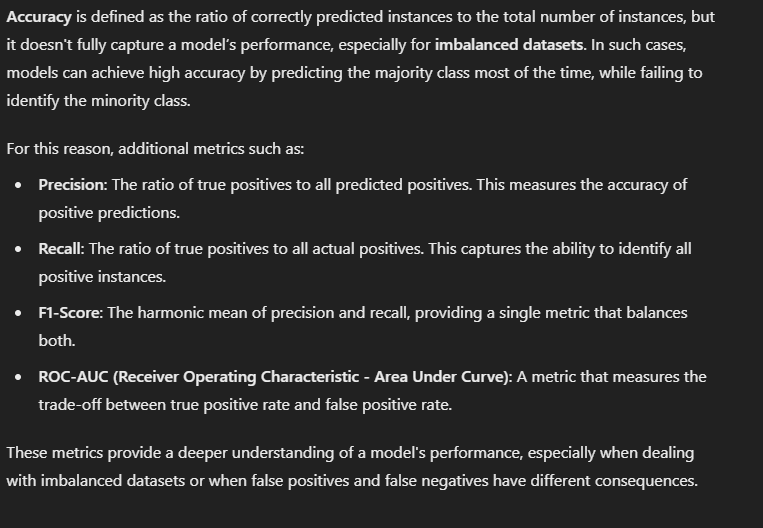

## Step 2: Implementing Different Metrics to Evaluate Perceptron


In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

# Step 1: Generate a synthetic dataset (imbalanced)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Perceptron
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Step 2: Calculate metrics beyond accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Accuracy: 0.84
Precision: 0.30
Recall: 0.45
F1-Score: 0.36
ROC-AUC: 0.67


## Step 3: Comparing Perceptron Performance Using Confusion Matrices


Confusion Matrix:
[[240  31]
 [ 16  13]]


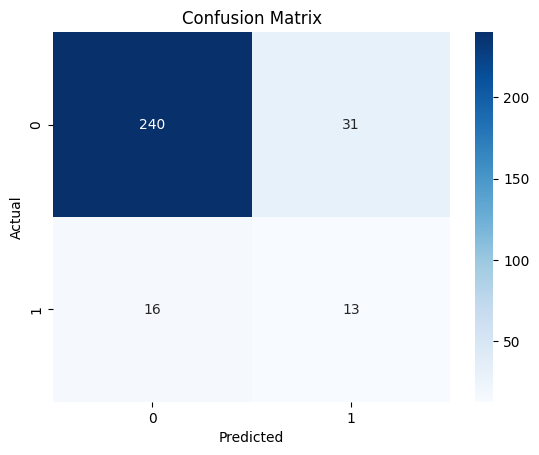

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Step 4: Using Cross-Validation for Robust Evaluation


Cross-validation is an important technique for assessing the generalization performance of a model. Instead of relying on a single train-test split, cross-validation (e.g., k-fold cross-validation) divides the data into multiple folds, trains the model on different folds, and averages the results to provide a more robust evaluation.



In [6]:
from sklearn.model_selection import cross_val_score

# Step 4: Perform 5-fold cross-validation
scores = cross_val_score(perceptron, X, y, cv=5, scoring='f1')

print(f"F1-scores from 5-fold cross-validation: {scores}")
print(f"Mean F1-score: {scores.mean():.2f}")


F1-scores from 5-fold cross-validation: [0.52941176 0.47368421 0.5        0.19047619 0.37681159]
Mean F1-score: 0.41


# Comparison of Model Evaluation Metrics


## General Comparison

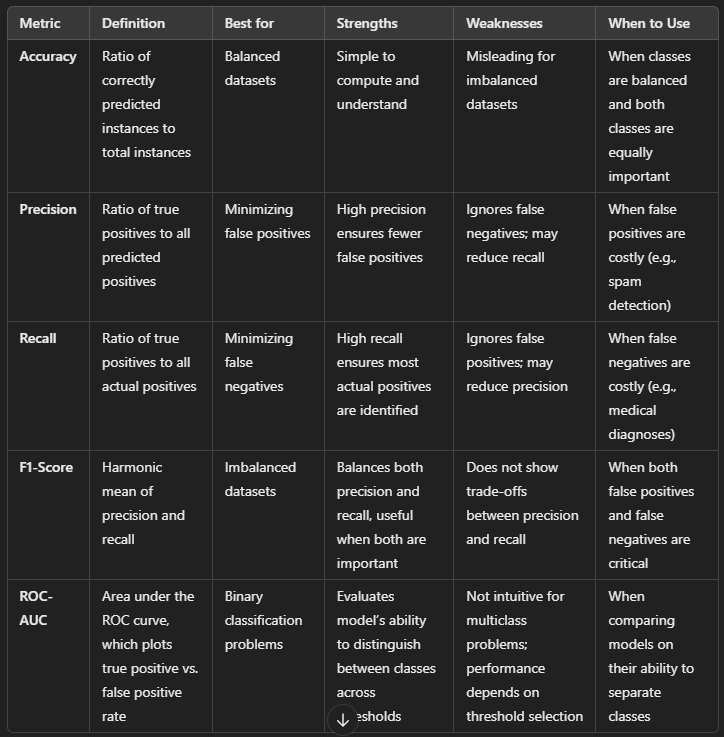

## Metric Performance on Balanced vs Imbalanced Datasets


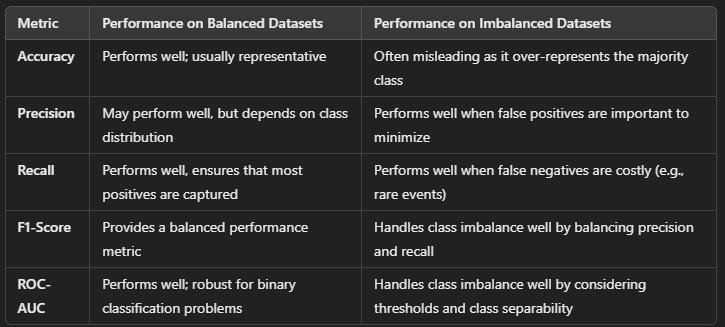

## Model Evaluation for Error Identification (via Confusion Matrix)


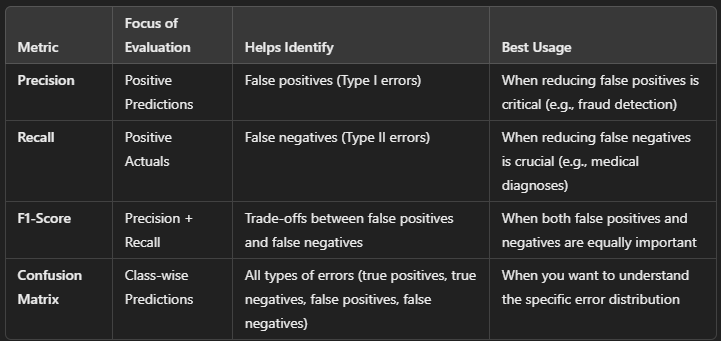

## Cross-Validation vs Single Evaluation


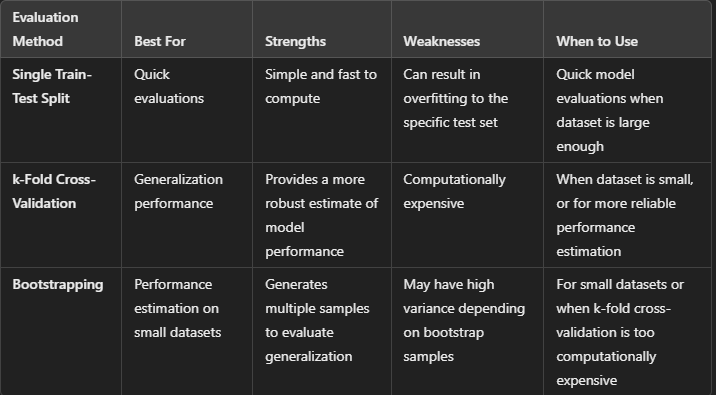